![](https://github.com/GabrielTrentino/Projetos-de-Cursos/blob/master/03-DSNP/00%20-%20Imagens/07_ChurnPredict.png?raw=true)

# PROJETO CHURN PREDICT:

A perda de clientes fiéis sempre é prejudicial para a estabilidade de um negócio e, para isso, a manutenção da carteira de clientes deve ser realizada periodicamente pela empresa com a finalidade principal de tirar insights sobre o comportamento deles.

A retenção dos clientes é um problema comumente estudado pelas empresas, tendo em vista que o custo de conquistar clientes novos é maior que o custo para manter um cliente com vinculo estabelecido.

Esse projeto tem como objetivo estudar o evento raro de clientes que evadem a empresa e quais são as características comum entre eles para traçar uma previsão de possíveis clientes que cometerão a evasão. Para que dessa forma, a empresa possa agir para reconquistar a fidelidade do cliente.



## Aquisição de Dados:

Os dados utilizados neste projeto foram originalmente disponibilizados na [plataforma de ensino da IBM Developer](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#), e tratam de um problema típico de uma companhia de telecomunicações. O *dataset* completo pode ser encontrado [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv).

Apesar de não haver informações explícitas disponíves, os nomes das colunas permitem um entendimento a respeito do problema.

In [ ]:
# import warnings filter
from warnings import simplefilter

# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

df = pd.read_csv('https://raw.githubusercontent.com/GabrielTrentino/Projetos-de-Cursos/master/03-DSNP/07%20-%20Telco%20Customer%20Churn.csv',
                 index_col='Unnamed: 0')

## Análise Exploratória do Data Set:

A Análise Exploratória é composta por técnicas simples que buscam extrair ou ilustrar as informações contidas nos dados, sem conter nenhuma alteração significativa. Com essa definição, utilizaremos da Visualização de Dados para aumentar a eficiência dessa exploração inicial.

A idéia dessa Análise é trabalharmos ela como uma exploração de hipoteses ou duvidas que possamos ter sobre um Data Set e, por isso, nada melhor que utilizarmos perguntas para instigarmos ou elucidar o que queremos achar.

*  Q1 - Quais são as Primeiras 5 Entradas do Data Set?
*  Q2 - Quais são as Ultimas 5 Entradas do Data Set?
*  Q3 - Quais são as Quantidades de Linhas e Colunas?
*  Q4 - Quais são os Tipo das variáveis existentes nesse Data Set?
*  Q5 - Existem dados Dados Ausentes?

### Q1 - Quais são as Primeiras 5 Entradas do Data Set?

A primeira pergunta a se fazer é sobre quais são as variáveis iremos utilizar nos modelos, para entendermos melhor, utilizaremos a função .head() que nos mostrará as primeiras entradas do DataSet e cruzaremos as informações com o que é descrito no Kaggle para criarmos nosso Dicionário de Variáveis.

In [ ]:
# Primeiras 5 entradas do Data Set:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Q2 - Quais são as Ultimas 5 Entradas do Data Set?

Em contrapartida, quais são as ultimas 5 entradas do nosso DataSet? Para isso, utilizamos a função `.tail()`.

In [ ]:
# Ultimas 5 entradas do Data Set:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


### Q3 - Quais são as Quantidades de Linhas e Colunas?

Observando as primeiras e ultimas entradas do Data Set, podemos notar inúmeras colunas existentes, a duvida que temos é: quantas colunas há nesse conjunto de dados? E quantas entradas?

Um dos passos principais da Análise Exploratória é entender as dimensões desses Data Frames, pois assim, conseguiremos ter uma noção de quantos dados estamos analisando e manipulando.

In [ ]:
# Quantidade de linhas e colunas do Data Set:
print('O DataFrame possui {} linhas e {} colunas'.format(df.shape[0], df.shape[1]))

O DataFrame possui 7043 linhas e 21 colunas


### Q4 - Quais são os Tipo das variáveis existentes nesse Data Set?

Outro ponto a ser observado são os tipos de dados de cada variável, isto é, se elas estão no formato string, inteiro ou float (por exemplo). Essa verificação inicial previne que erros futuros na manipulação dos dados

In [ ]:
# As variáveis presentes e seus tipos:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Observando os tipos das variáveis, pode-se observar que a variável `TotalCharges` está no formato `string`. Porém, essa variável representa a quantidade de dinheiro que o cliente ja utilizou na Companhia telefonico. Logo, é uma variável que **deva ser convertida para `float`**.

In [ ]:
# Criando uma função para converter o valor para float:
def str_float(valor):
  try:
    return float(valor)
  except:
    # Se não conseguir converter, o valor será np.nan 
    return np.nan

df["TotalCharges"] = df["TotalCharges"].apply(str_float)

### Q5 - Existem dados Dados Ausentes?

Um ponto que deve-se atentar é a presença ou ausência de dados no Data Set. Uma vez que se forem uma quantidade significativa, os dados terão de ser modelados. Nesse caso, será visto a % de dados ausentes (`np.nan`) no Data Set.

In [ ]:
# Quantidade de entradas vazias:
df.isnull().sum()/df.shape[0]

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.001562
Churn               0.000000
dtype: float64

Podemos ver que a unica variável que possui valores ausentes é o `TotalCharges`, devido à formula que aplicamos anteriormente.

## Dicionário de Variáveis:

Nessa parte do notebook é descrito quais são as variáveis presentes no Data Set e qual é o significado dela. É uma parte crucial para entendermos o que estaremos

* `customerID` -> ID do Cliente;
* `gender` -> Gênero do Cliente;
* `SeniorCitizen` -> Se o Cliente é Idoso ou não;
* `Partner` -> Se o Cliente possue Parceiro ou não;
* `Dependents` -> Se o Cliente possue dependentes ou não;
* `tenure` -> Quantidade de meses que os Clientes permaneceu como Cliente;
* `PhoneService` -> Se o Cliente possue ou não Serviço Telefônico;
* `MultipleLines` -> Se o Cliente possue multiplas linhas ou não;
* `InternetService` -> Provedor de Internet do Cliente (Fibra otica, DSL, etc);
* `OnlineSecurity` -> Se o Cliente possue ou não um Sistema de Segurança Online;
* `OnlineBackup` -> Se o Cliente possue ou não um Backup Online;
* `DeviceProtection` -> Se o Cliente possue ou não Proteção de Dipositivo (Garantias);
* `TechSupport` -> Se o Cliente possue ou não Assistência Técnica;
* `StreamingTV` -> Se o Cliente possue ou não Sistema de Streaming de TV;
* `StreamingMovies` -> Se o Cliente possue ou não Sistema de Streaming de Filmes;
* `Contract` -> O tipo de contrato na companhia (`Month-to-Month`- Mês a mês, `One Year` - Anual, `Two Year` - Bianual);
* `PaperlessBilling` -> Se o Cliente recebe as Faturas por meios eletronicos (tipo Email - `Yes`) ou por meios físicos (Carnês, boletos, correspondencias - `No`);
* `PaymentMethod` -> O Metodo de Pagamento do Cliente: `Electronic check`, `Mailed check`, `Bank Transfer` ou `Credit Card`;
* `MonthlyCharges` -> O quanto é cobrador pelo consumidor;
* `TotalCharges` -> O quanto ja foi cobrado do consumidor ao decorrer dos meses de contrato;
* `Churn` -> **Variável Alvo** -> Evasão do Cliente;

Para os estudos realizados nesse notebook, a variável `customerID` não terá nenhuma utilidade prática. Porém, em um modelo de negócio mais robusto, essa variável é utilizada para a identificação do cliente após o modelo prever a inativação do cliente (Churn Prediction).

## Avançando na Análise Exploratória:

Continuando a Análise Exploratória dos dados, perguntas e hipóteses novas são geradas, tais como:

* Como é a Regrade Pareto para essa Empresa?
* Q1 - Qual a quantidade de Churn por Gênero?
* Q2 - Qual a quantidade de Churn pela Senioridade (por clientes de idade)?
* Q3 - A evasão é maior quando o Cliente possui parceiros ou não?
* Q4 - A evasão é maior quando o Cliente possui dependentes?
* Q5 - Quais tipos de contratos possuem maior Taxa de Evasão?


### Regra de Pareto:

A regra de pareto (ou principio), afirma que 80% das consequências advém de 20% das causas. Se formos levar para o lado monetário, temos que 80% dos lucros vem de 20% da carteira de clientes. 

Sabendo disso, 

Text(0.5, 0.98, 'Comparação Pareto do Faturamento Mensal de Clientes Ativos e Inativos')

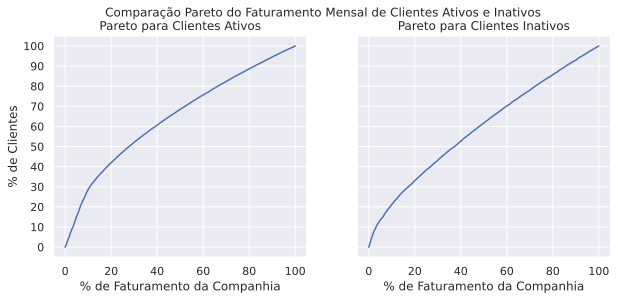

In [ ]:
def pareto(coluna, churn):
  df_filtrado = df.loc[df.Churn == churn].sort_values('MonthlyCharges', ascending=False).dropna()

  df_pareto =[]
  for i in range(0, 101, 1):
    dados = df_filtrado.loc[df_filtrado.MonthlyCharges<= df_filtrado.MonthlyCharges.quantile(q=i/100)]
    df_pareto.append([i, dados.shape[0], 100*dados.MonthlyCharges.sum()/df_filtrado.MonthlyCharges.sum()])

  return pd.DataFrame(df_pareto, columns = ['% de Clientes', 'Nº Clientes', '% Faturamento dos Clientes'])

df_pareto_orig = [pareto('MonthlyCharges', 'No'), pareto('MonthlyCharges', 'Yes')]
fig, ax = plt.subplots(1, 2, figsize=(10,4), sharey=True)
sns.set()

for i in range(len(ax)):
  df_pareto = df_pareto_orig[i]
  sns.lineplot(data=df_pareto, y='% de Clientes', x='% Faturamento dos Clientes', ax=ax[i])
  plt.yticks(range(0, 101, 10))

ax[1].set_ylabel('')
ax[0].set_title('Pareto para Clientes Ativos')
ax[1].set_title('Pareto para Clientes Inativos')
ax[0].set_xlabel('% de Faturamento da Companhia')
ax[1].set_xlabel('% de Faturamento da Companhia')
plt.suptitle('Comparação Pareto do Faturamento Mensal de Clientes Ativos e Inativos', fontsize=12)

In [ ]:
pd.DataFrame(df_pareto_orig[0].loc[42]).round(2)

,42
% de Clientes,42.00
Nº Clientes,2170.00
% Faturamento dos Clientes,20.04


Com a regra de pareto aplicada, podemos observar que 20% do faturamento corresponde à 42% dos clientes. Enquanto 80% restante do faturamento equivale à 58% dos clientes.

In [ ]:
pd.DataFrame(df_pareto_orig[1].loc[33]).round(2)

,33
% de Clientes,33.00
Nº Clientes,618.00
% Faturamento dos Clientes,19.95


Em contra partida, para os clientes que evadiram, 20% do faturamento está ligado a 33% da quantida de clientes. Enquanto 80% do faturamento está em 67% dos clientes.

Dessa forma, podemos observar uma leve melhoria no desempenho da empresa. Uma vez que os 80% do faturamento vão de 67% dos clientes para 58%, uma vez que o objetivo é os 20% dos clientes.

### Q1 - Qual a quantidade de Churn por Gênero?

Uma das variáveis observadas dos clientes presentes no Data Set é o Gênero, sabendo disso, qual seria a quantidade de evasão desses clientes de acordo com o seu gênero? Haveria alguma diferença?

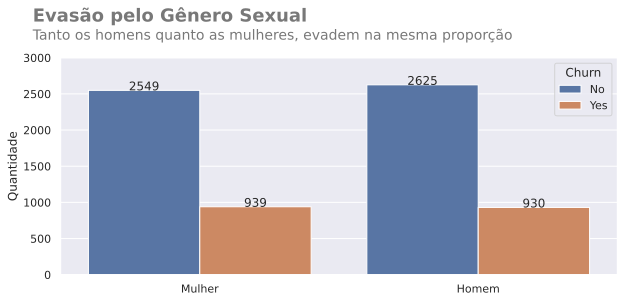

In [ ]:
sns.set()
fig, ax = plt.subplots(figsize=(10,4))

ax = sns.countplot(x='gender', hue='Churn', data=df)
ax.set(ylim=(0,3000))

for p in ax.patches:
  ax.annotate('{:.0f}'.format(p.get_height()),  (p.get_x()+ p.get_width()/2, p.get_height()), size=12, ha='center')

plt.xlabel('')
ax.set_xticklabels(['Mulher', 'Homem'])
plt.ylabel('Quantidade', fontsize=12)

plt.text(-0.6, 3500, 'Evasão pelo Gênero Sexual', fontsize=18, color='#787878', weight='bold')
plt.text(-0.6, 3400, 'Tanto os homens quanto as mulheres, evadem na mesma proporção',
         verticalalignment="top", fontsize=14, color='#787878');

O Dataset dos clientes está bastante balanceado em questão da divisão dos gêneros. Pode-se observar que a quantidade de Mulheres nesse Data Set é um pouco inferior em relação a quantidade de Homens.

### Q2 - Qual a quantidade de Churn pela Senioridade (por clientes de idade)?
Um segundo aspecto a se levar em conta é, como que as pessoas de idade se comportam em relação à compania telefonica? Eles tendem a cancelar mais que as demais pessoas?

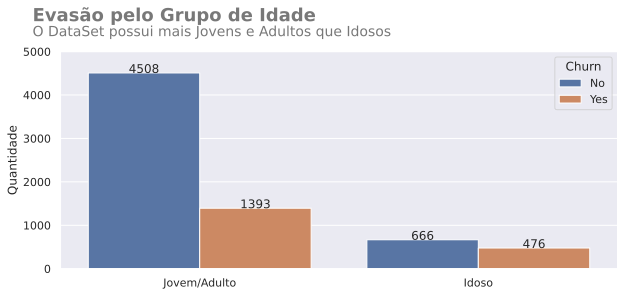

In [ ]:
sns.set()
fig, ax = plt.subplots(figsize=(10,4))

ax = sns.countplot(x='SeniorCitizen', hue='Churn', data=df)
ax.set(ylim=(0,5000))

for p in ax.patches:
  ax.annotate('{:.0f}'.format(p.get_height()),  (p.get_x()+ p.get_width()/2, p.get_height()), size=12, ha='center')

plt.xlabel('')
ax.set_xticklabels(['Jovem/Adulto', 'Idoso'])
plt.ylabel('Quantidade', fontsize=12)

plt.text(-0.6, 5700, 'Evasão pelo Grupo de Idade', fontsize=18, color='#787878', weight='bold')
plt.text(-0.6, 5600, 'O DataSet possui mais Jovens e Adultos que Idosos',
         verticalalignment="top", fontsize=14, color='#787878');

A primeira coisa podemos observar é que a quantidade de Idosos é significativamente menor do que os Jovens e adultos. Para descobrirmos a quantidade em % de clientes que largam o serviço da empresa de telefonia, usamos esse código à baixo:

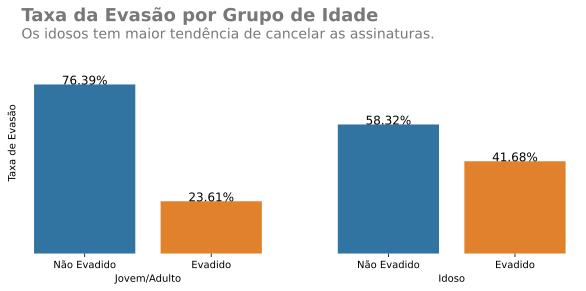

In [ ]:
alvo = 'SeniorCitizen'

sns.reset_defaults()
fig, ax = plt.subplots(1, 2,figsize=(10,4))
filtro = [0, 1]
for i in range(0, len(ax)):
  dados = df.loc[df[alvo]==filtro[i], 'Churn'].value_counts()/df.loc[df[alvo]==filtro[i], 'Churn'].shape[0]
  sns.barplot(x='index', y='Churn',data=pd.DataFrame(dados).reset_index(), ax=ax[i])
  ax[i].set(ylim=(0,1))
  for p in ax[i].patches:
    ax[i].annotate('{:.2f}%'.format(p.get_height()*100),  (p.get_x()+ p.get_width()/2, p.get_height()), size=12, ha='center')
  for lado in ['left', 'bottom', 'right', 'top']:
    ax[i].spines[lado].set_visible(False)
  ax[i].axes.yaxis.set_ticks([])
  ax[i].set(xticklabels=['Não Evadido', 'Evadido'])

ax[0].set_xlabel('Jovem/Adulto')
ax[1].set_xlabel('Idoso')
ax[0].set_ylabel('Taxa de Evasão')
ax[1].set_ylabel('')
plt.text(-2.9, 1.05, 'Taxa da Evasão por Grupo de Idade', fontsize=18, color='#787878', weight='bold')
plt.text(-2.9, 1.02, 'Os idosos tem maior tendência de cancelar as assinaturas.',
         verticalalignment="top", fontsize=14, color='#787878');

Pode ser visto que a quantidade de clientes idosos que evadem tendem a ser maiores que os clientes que não são. Essa possa ser uma varíavel de decisão futuramente.

### Q3 - A evasão é maior quando o Cliente possui parceiros ou não?
Seguindo a linha de raciocínio, clientes que possuem parceiros tendem a cancelar a linha telefonica ou qualquer outra pacote de dados?

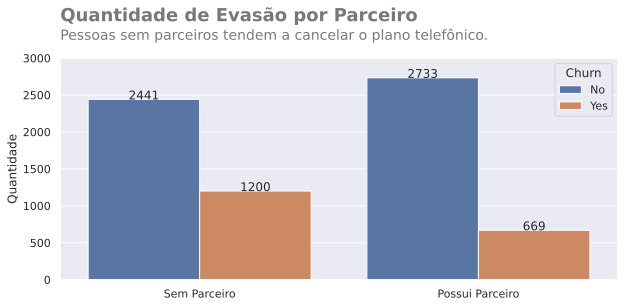

In [ ]:
sns.set()
fig, ax = plt.subplots(figsize=(10,4))

ax = sns.countplot(x='Partner', hue='Churn', data=df.sort_values('Partner'))
ax.set(ylim=(0,3000))
for p in ax.patches:
  ax.annotate('{:.0f}'.format(p.get_height()),  (p.get_x()+ p.get_width()/2, p.get_height()), size=12, ha='center')

plt.xlabel('')
ax.set_xticklabels(['Sem Parceiro', 'Possui Parceiro'])
plt.ylabel('Quantidade', fontsize=12)

plt.text(-0.5, 3500, 'Quantidade de Evasão por Parceiro', fontsize=18, color='#787878', weight='bold')
plt.text(-0.5, 3400, 'Pessoas sem parceiros tendem a cancelar o plano telefônico.',
         verticalalignment="top", fontsize=14, color='#787878');

Até então não é possível distinguir visualmente se há mais clientes com parceiros ou sem parceiros. Mas um ponto interessante de se observar é que a Quantidade de clientes *com parceiros* que não possuem conta é significativamente menor que os clientes *sem parceiros* que não possuem conta. 

Com isso, qual a % de clientes com parceiros que cancelam as contas?

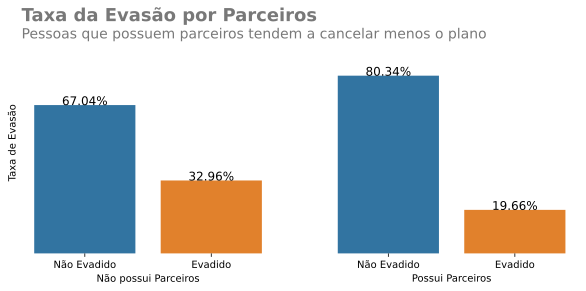

In [ ]:
alvo = 'Partner'

sns.reset_defaults()
fig, ax = plt.subplots(1, 2,figsize=(10,4))
filtro = ['No', 'Yes']
for i in range(0, len(ax)):
  dados = df.loc[df[alvo]==filtro[i], 'Churn'].value_counts()/df.loc[df[alvo]==filtro[i], 'Churn'].shape[0]
  sns.barplot(x='index', y='Churn',data=pd.DataFrame(dados).reset_index(), ax=ax[i])
  ax[i].set(ylim=(0,1))
  for p in ax[i].patches:
    ax[i].annotate('{:.2f}%'.format(p.get_height()*100),  (p.get_x()+ p.get_width()/2, p.get_height()), size=12, ha='center')
  for lado in ['left', 'bottom', 'right', 'top']:
    ax[i].spines[lado].set_visible(False)
  ax[i].axes.yaxis.set_ticks([])
  ax[i].set(xticklabels=['Não Evadido', 'Evadido'])

ax[0].set_xlabel('Não possui Parceiros')
ax[1].set_xlabel('Possui Parceiros')
ax[0].set_ylabel('Taxa de Evasão')
ax[1].set_ylabel('')
plt.text(-2.9, 1.05, 'Taxa da Evasão por Parceiros', fontsize=18, color='#787878', weight='bold')
plt.text(-2.9, 1.02, 'Pessoas que possuem parceiros tendem a cancelar menos o plano',
         verticalalignment="top", fontsize=14, color='#787878');

Com o gráfico podemos comparar em proporção que clientes com parceiros

### Q4 - Dependentes

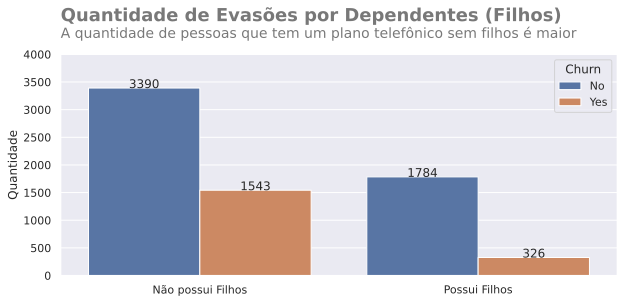

In [ ]:
sns.set()
fig, ax = plt.subplots(figsize=(10,4))

ax = sns.countplot(x='Dependents', hue='Churn', data=df)
ax.set(ylim=(0,4000))
for p in ax.patches:
  ax.annotate('{:.0f}'.format(p.get_height()),  (p.get_x()+ p.get_width()/2, p.get_height()), size=12, ha='center')

plt.xlabel('')
ax.set_xticklabels(['Não possui Filhos', 'Possui Filhos'])
plt.ylabel('Quantidade', fontsize=12)

plt.text(-0.5, 4600, 'Quantidade de Evasões por Dependentes (Filhos)', fontsize=18, color='#787878', weight='bold')
plt.text(-0.5, 4500, 'A quantidade de pessoas que tem um plano telefônico sem filhos é maior',
         verticalalignment="top", fontsize=14, color='#787878');

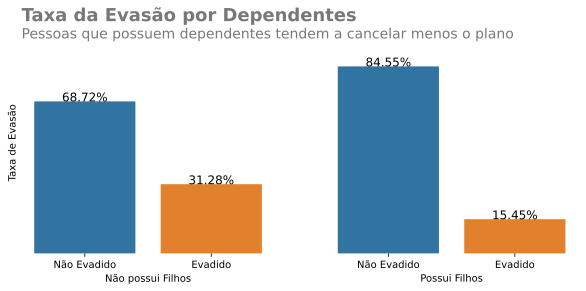

In [ ]:
alvo = 'Dependents'

sns.reset_defaults()
fig, ax = plt.subplots(1, 2,figsize=(10,4))
filtro = ['No', 'Yes']
for i in range(0, len(ax)):
  dados = df.loc[df[alvo]==filtro[i], 'Churn'].value_counts()/df.loc[df[alvo]==filtro[i], 'Churn'].shape[0]
  sns.barplot(x='index', y='Churn',data=pd.DataFrame(dados).reset_index(), ax=ax[i])
  ax[i].set(ylim=(0,1))
  for p in ax[i].patches:
    ax[i].annotate('{:.2f}%'.format(p.get_height()*100),  (p.get_x()+ p.get_width()/2, p.get_height()), size=12, ha='center')
  for lado in ['left', 'bottom', 'right', 'top']:
    ax[i].spines[lado].set_visible(False)
  ax[i].axes.yaxis.set_ticks([])
  ax[i].set(xticklabels=['Não Evadido', 'Evadido'])

ax[0].set_xlabel('Não possui Filhos')
ax[1].set_xlabel('Possui Filhos')
ax[0].set_ylabel('Taxa de Evasão')
ax[1].set_ylabel('')
plt.text(-2.9, 1.05, 'Taxa da Evasão por Dependentes', fontsize=18, color='#787878', weight='bold')
plt.text(-2.9, 1.02, 'Pessoas que possuem dependentes tendem a cancelar menos o plano',
         verticalalignment="top", fontsize=14, color='#787878');

### Q5 - Tipos de Contrato

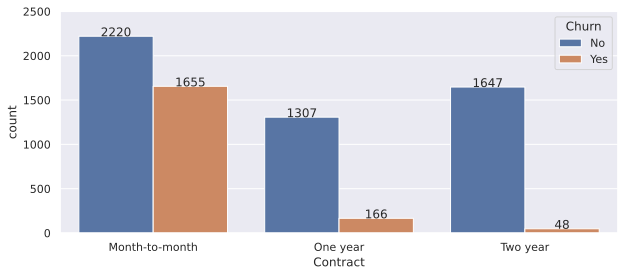

In [ ]:
sns.set()
fig, ax = plt.subplots(figsize=(10,4))

ax = sns.countplot(x='Contract', hue='Churn', data=df)
ax.set(ylim=(0, 2500))
for p in ax.patches:
  ax.annotate('{:.0f}'.format(p.get_height()),  (p.get_x()+ p.get_width()/2, p.get_height()), size=12, ha='center')

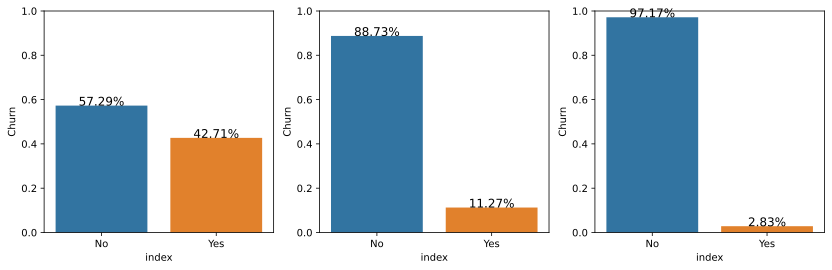

In [ ]:
alvo = 'Contract'

sns.reset_defaults()
fig, ax = plt.subplots(1, len(df.Contract.unique()),figsize=(14,4))
filtro = ['Month-to-month', 'One year', 'Two year']
for i in range(0, len(ax)):
  dados = df.loc[df[alvo]==filtro[i], 'Churn'].value_counts()/df.loc[df[alvo]==filtro[i], 'Churn'].shape[0]
  sns.barplot(x='index', y='Churn',data=pd.DataFrame(dados).reset_index(), ax=ax[i])
  ax[i].set(ylim=(0,1))
  for p in ax[i].patches:
    ax[i].annotate('{:.2f}%'.format(p.get_height()*100),  (p.get_x()+ p.get_width()/2, p.get_height()), size=12, ha='center')

### Q6 - Monthly Charge

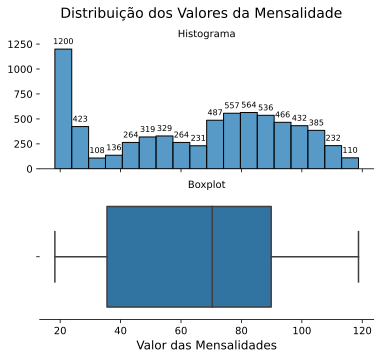

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(6,5), sharex=True)
fig.suptitle('Distribuição dos Valores da Mensalidade', fontsize=14)

sns.histplot(df.MonthlyCharges, ax=ax1)
for p in ax1.patches:
  ax1.annotate('{:.0f}'.format(p.get_height()),  (p.get_x()+ p.get_width()/2, p.get_height()+50), size=8, ha='center')
ax1.set_title('Histograma', fontsize=10)
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)

sns.boxplot(df.MonthlyCharges, ax=ax2)
ax2.set_title('Boxplot', fontsize=10)
ax2.set_xlabel('Valor das Mensalidades', fontsize=12)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)

### Q7 - Total Charges

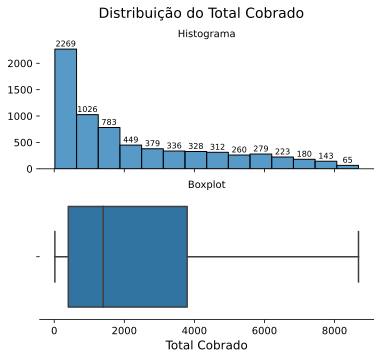

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(6,5), sharex=True)
fig.suptitle('Distribuição do Total Cobrado', fontsize=14)

sns.histplot(df.TotalCharges, ax=ax1, bins=14)
for p in ax1.patches:
  ax1.annotate('{:.0f}'.format(p.get_height()),  (p.get_x()+ p.get_width()/2, p.get_height()+50), size=8, ha='center')
ax1.set_title('Histograma', fontsize=10)
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)

sns.boxplot(df.TotalCharges, ax=ax2)
ax2.set_title('Boxplot', fontsize=10)
ax2.set_xlabel('Total Cobrado', fontsize=12)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Correção de Labels:

In [ ]:
df_clean = df.copy()
df_clean['gender'] = df_clean['gender'].map(lambda x: 1 if x == 'Male' else 0)

colunas=['Partner', 'Dependents', 'PhoneService', 'OnlineSecurity',
         'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
         'StreamingMovies', 'PaperlessBilling', 'Churn', 'MultipleLines']

for col in colunas:
  df_clean[col] = df_clean[col].map(lambda x: 1 if x == 'Yes' else 0)

colunas=['InternetService', 'Contract', 'PaymentMethod']
df_clean = pd.get_dummies(df_clean, columns=colunas)

df_clean.dropna(axis=0, inplace=True)

# Teste Primeiro Modelo:

Para termos uma baseline, será utilziado a Random Forest Classifier para que seja obtido um Recall e, em seguida, comparado com os outros modelos.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# separar a feature matrix da target vector
X = df_clean.drop(['Churn', 'customerID'], axis=1)
y = df_clean['Churn']

# dividir os dados entre treino e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y)

modelo = RandomForestClassifier()

X = np.array(X)
y = np.array(y)

pipeline = make_pipeline(StandardScaler(), modelo)
scores = cross_val_score(pipeline, X, y, scoring='recall')
print("Recall: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std()))

score_baseline = scores.mean()

Recall: 0.49 (+/- 0.01)


# Modelo

In [ ]:
# Classificação Supervisionada:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Cross Validation - Validação Cruzada:

from sklearn.model_selection import cross_validate

# MLA -> Machine Learning Algorithms (Algoritmos de Machine Learning):

MLA = [#Modelos Ensemble:
       AdaBoostClassifier(),
       GradientBoostingClassifier(),
       RandomForestClassifier(n_estimators=10, n_jobs=1, random_state=0), 

       #Modelos Lineares:
       LogisticRegression(max_iter=1000),

       #Naive Bayes:
       GaussianNB(),
       
       #KNN:
       KNeighborsClassifier(),

       #Decision Tree Classifier:
       DecisionTreeClassifier(),

       #SVC:
       SVC(max_iter=10000),
       
       #XGB:
       XGBClassifier(max_iter=1000)]

In [ ]:
X = df_clean.drop(['customerID', 'Churn'], axis=1).copy()
y = df_clean.loc[:,'Churn'].copy()

MLA_df = pd.DataFrame(columns = ['MLA Nome', 'Acuracia Treino', 'Acuracia Teste'])

linha = 0

for alg in MLA:
  cv_resultados = cross_validate(alg, X, y, cv=10, return_train_score=True)
  
  MLA_df.loc[linha, 'MLA Nome'] = alg.__class__.__name__
  MLA_df.loc[linha, 'Acuracia Treino'] = cv_resultados['train_score'].mean()
  MLA_df.loc[linha, 'Acuracia Teste'] = cv_resultados['test_score'].mean()
  linha+= 1
  
MLA_df

,MLA Nome,Acuracia Treino,Acuracia Teste
0,AdaBoostClassifier,0.809127,0.802329
1,GradientBoostingClassifier,0.825654,0.803468
2,RandomForestClassifier,0.980265,0.782567
3,LogisticRegression,0.805176,0.803328
4,GaussianNB,0.746413,0.746017
5,KNeighborsClassifier,0.831342,0.76166
6,DecisionTreeClassifier,0.99763,0.726963
7,SVC,0.734215,0.734215
8,XGBClassifier,0.820693,0.805316


In [ ]:
from sklearn.model_selection import GridSearchCV